[0, 7.115, 13.88, 20.08, 26.045, 31.995, 37.565, 43.2, 48.26, 53.11, 57.905, 62.87, 67.525, 72.07, 76.62, 81.1, 85.34, 89.64, 94.01, 98.215, 102.305, 106.325, 110.385, 114.07, 117.82, 121.735, 125.46, 129.02, 132.67, 136.215, 139.61, 142.935, 146.445, 150.03, 153.535, 156.92, 160.16, 163.445, 166.58, 169.875, 173.25, 176.33, 179.415, 182.49, 185.52, 188.375, 191.39, 194.38, 197.305, 200.41, 203.335, 205.97, 208.875, 211.475, 214.19, 216.87, 219.41, 222.035, 224.705, 227.36, 230.025, 232.695, 235.305, 237.785, 240.36, 242.905, 245.375, 248.02, 250.615, 253.07, 255.535, 258.075, 260.65, 263.115, 265.395, 267.695, 270.085, 272.22, 274.53, 276.86, 279.17, 281.475, 283.59, 285.925, 288.09, 290.185, 292.245, 294.325, 296.455, 298.675, 300.975, 303.08, 305.035, 307.21, 309.285, 311.36, 313.21, 314.95, 316.965, 318.96, 320.855, 322.985, 324.895, 327.11, 328.995, 330.955, 332.985, 334.865, 336.8, 338.51, 340.465, 342.33, 344.275, 346.14, 348.105, 350.025, 351.8, 353.555, 355.365, 357.16, 358.84

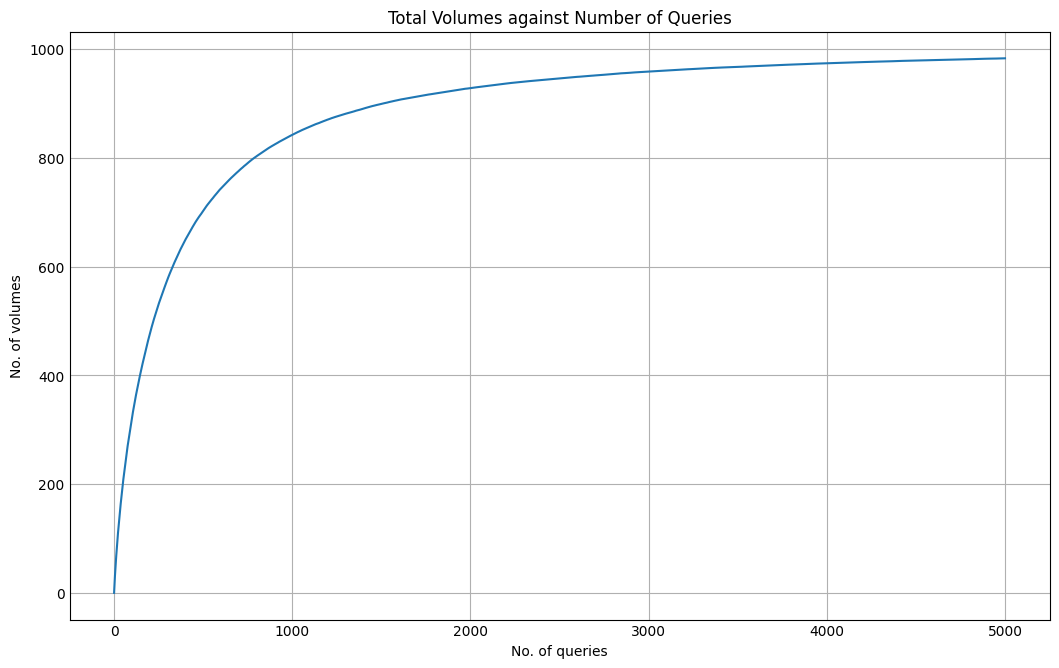

In [5]:
import math 
import random 
import matplotlib.pyplot as plt 

RSEmax = 512

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)



def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(int(math.log(RSEmax, 2)+1)):
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i+1) !=  1:
                break
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return(query_list)


max_volumes = int(RSEmax*2 - 1)
no_of_runs = 200
no_of_queries = 5000
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print (arr)
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()



